# Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
%matplotlib inline

ImportError: No module named 'seaborn'

# Importing Dataset

In [3]:
df = pd.read_csv("base_superbock_1.csv", index_col=False)
df.columns

Index(['CONDIGO_PRODUTO', 'OEE', 'SOMA_GEA', 'TEMPO_DEGRADADO',
       'TRABALHO_REAL_ELETRICISTA', 'TRABALHO_REAL_MECANICO',
       'TRABALHO_REAL_PREVENTIVA', 'OUTROS_TEMPOS_PARAGEM', 'TEMPO_ARRANQUE',
       ' TEMPO_EMBALAGEM_IMPROPRIA', 'TEMPO_TESTES', 'TEMPO_FALHA_LOGISTICA',
       ' TEMPO_LIMPEZA', ' TMP_TAM', ' TEMPO_ALMOCO', ' L1_TAV', 'L2_TAV',
       'L3_TAV', 'L4_TAV', 'L5_TAV', 'L6_TAV', 'L7_TAV', 'TAV_BANDEADORA',
       ' TAV_CINTADORA', ' TAV_DESENGRADORA', ' TAV_DESPALETIZADORA',
       ' TAV_EMBALADORA', ' TAV_ENCARTONADORA', 'TAV_ENGRADADORA',
       ' TAV_ENVOLVEDORA', ' TAV_INSPETOR_CHEIO', ' TAV_INSPETOR_VAZIO',
       ' TAV_LAVADORA', ' TAV_PALETIZADORA', ' TAV_PASTEURIZADOR',
       ' TAV_ROTULADORA', ' TAV_SOPRADORA', ' TAV_TRANSPORTADORES'],
      dtype='object')

In [4]:
df.dtypes

CONDIGO_PRODUTO                 int64
OEE                           float64
SOMA_GEA                        int64
TEMPO_DEGRADADO               float64
TRABALHO_REAL_ELETRICISTA     float64
TRABALHO_REAL_MECANICO        float64
TRABALHO_REAL_PREVENTIVA        int64
OUTROS_TEMPOS_PARAGEM         float64
TEMPO_ARRANQUE                float64
 TEMPO_EMBALAGEM_IMPROPRIA    float64
TEMPO_TESTES                  float64
TEMPO_FALHA_LOGISTICA         float64
 TEMPO_LIMPEZA                float64
 TMP_TAM                      float64
 TEMPO_ALMOCO                 float64
 L1_TAV                         int64
L2_TAV                          int64
L3_TAV                          int64
L4_TAV                          int64
L5_TAV                          int64
L6_TAV                        float64
L7_TAV                          int64
TAV_BANDEADORA                  int64
 TAV_CINTADORA                  int64
 TAV_DESENGRADORA               int64
 TAV_DESPALETIZADORA            int64
 TAV_EMBALAD

In [5]:
X = df.drop(['OEE',' L1_TAV','L2_TAV','L3_TAV','L4_TAV','L5_TAV','L7_TAV'],axis=1)
y = df['OEE']

# Split data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [7]:
from sklearn import linear_model
from sklearn import ensemble

# lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
# lr = linear_model.LinearRegression()
# lr = ensemble.GradientBoostingRegressor()
lr = linear_model.TheilSenRegressor()

/usr/local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
model = lr.fit(X_train, y_train)

In [9]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.9836189647129081


In [10]:
predictions = model.predict(X_val)

Text(0.5, 1.0, 'Theil-Sen Estimator: multivariate regression model')

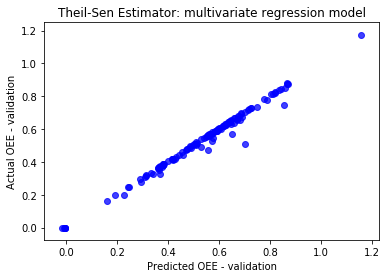

In [11]:
actual_values = y_val
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted OEE - validation')
plt.ylabel('Actual OEE - validation')
plt.title('Theil-Sen Estimator: multivariate regression model')

In [12]:
print(model.coef_)

[ 2.29517513e-12  2.03407772e-09 -9.79788143e-01 -3.65886977e-05
 -2.13191970e-05 -4.09574397e-05 -9.94102866e-01 -8.87881748e-01
 -9.86215802e-01 -8.95674334e-01 -9.74466631e-01 -9.94660004e-01
 -1.00014525e+00 -1.02165604e+00 -9.95389307e-01 -1.99126865e-17
  7.76669408e-17 -4.49711652e-18  3.87615159e-18 -9.92307024e-01
 -9.91633012e-01 -9.98211464e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.69885137e-01
 -7.80603207e-01 -9.88703347e-01  0.00000000e+00]


In [99]:
print(X.columns)

Index(['CONDIGO_PRODUTO', 'SOMA_GEA', 'TEMPO_DEGRADADO',
       'TRABALHO_REAL_ELETRICISTA', 'TRABALHO_REAL_MECANICO',
       'TRABALHO_REAL_PREVENTIVA', 'OUTROS_TEMPOS_PARAGEM', 'TEMPO_ARRANQUE',
       ' TEMPO_EMBALAGEM_IMPROPRIA', 'TEMPO_TESTES', 'TEMPO_FALHA_LOGISTICA',
       ' TEMPO_LIMPEZA', ' TMP_TAM', ' TEMPO_ALMOCO', 'L6_TAV',
       'TAV_BANDEADORA', ' TAV_CINTADORA', ' TAV_DESENGRADORA',
       ' TAV_DESPALETIZADORA', ' TAV_EMBALADORA', ' TAV_ENCARTONADORA',
       'TAV_ENGRADADORA', ' TAV_ENVOLVEDORA', ' TAV_INSPETOR_CHEIO',
       ' TAV_INSPETOR_VAZIO', ' TAV_LAVADORA', ' TAV_PALETIZADORA',
       ' TAV_PASTEURIZADOR', ' TAV_ROTULADORA', ' TAV_SOPRADORA',
       ' TAV_TRANSPORTADORES'],
      dtype='object')
